<a href="https://colab.research.google.com/github/jsroa15/Kaggle-Projects/blob/main/Titanic_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importings and data loading

In [ ]:
#Importings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [ ]:
#Loading data
training=pd.read_csv('/content/sample_data/train (1).csv')

# Exploratory Data Analysis

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


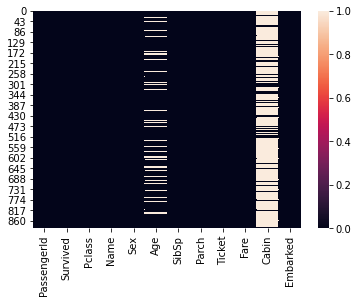

In [ ]:
#Exploring data shape and info
print(training.shape)
training.info()
sns.heatmap(training.isna())


In [ ]:
#How the data looks
training.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
#Exploring numerical features
print(training.columns)
numerical=['Age','SibSp','Parch','Fare']
training_numerical=training[numerical]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


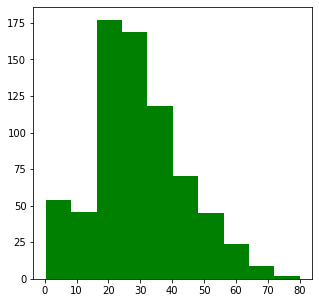

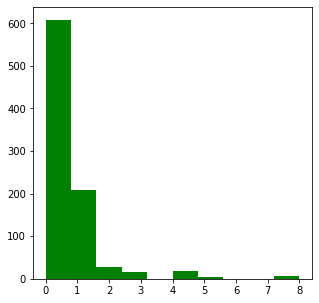

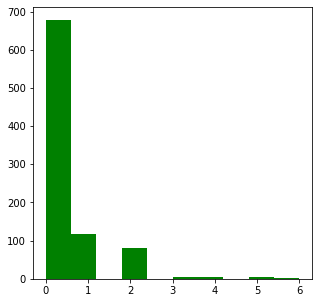

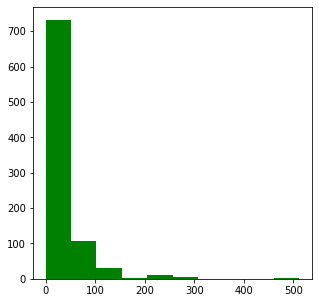

In [ ]:
#Histograms
for i in training_numerical.columns:
  plt.figure(figsize=(5,5))
  plt.hist(training_numerical[i],color='green')
  plt.title=i
  plt.show()

In [ ]:
# Mean, median, etc
print(training_numerical.describe())

              Age       SibSp       Parch        Fare
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594   32.204208
std     14.526497    1.102743    0.806057   49.693429
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    0.000000    0.000000    7.910400
50%     28.000000    0.000000    0.000000   14.454200
75%     38.000000    1.000000    0.000000   31.000000
max     80.000000    8.000000    6.000000  512.329200


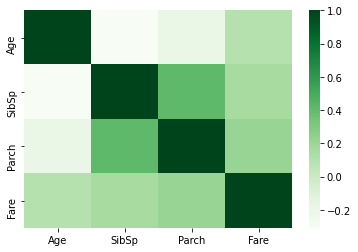

In [ ]:
# Correlation between variables
training_numerical.corr()
sns.heatmap(training_numerical.corr(),cmap="Greens")

In [ ]:
#Pivot tables
pd.pivot_table(training,training_numerical,index='Survived')

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [ ]:
#Exploring categorical variables
categorical=['Survived','Sex', 'Cabin', 'Embarked','Pclass']
training_categorical=training[categorical]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


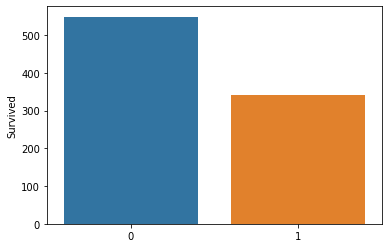

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


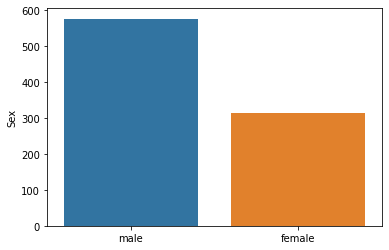

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


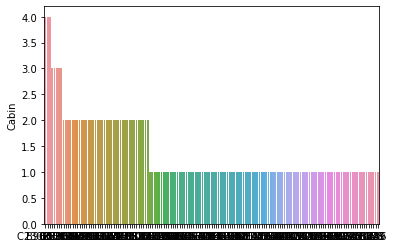

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


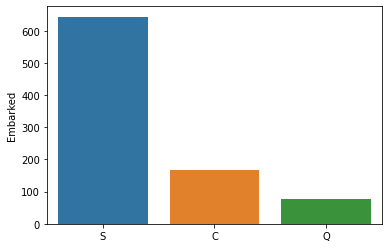

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


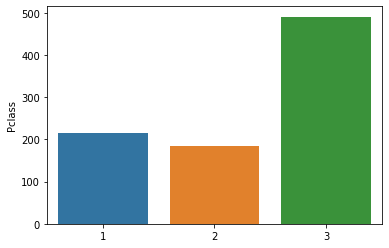

In [ ]:
#Barplots
for i in training_categorical.columns:
  sns.barplot(training_categorical[i].value_counts().index,training_categorical[i].value_counts(),data=training_categorical)
  plt.show()

In [ ]:
#Exploring survival rate acros the other categorical values
forpivot=['Sex','Embarked','Pclass']
for i in forpivot:
  print('\n\n',pd.pivot_table(training,values='PassengerId',index='Survived',columns=i,aggfunc='count'))




 Sex       female  male
Survived              
0             81   468
1            233   109


 Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


 Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


# **Feature Engineering**

In [ ]:
#Create a new feature relatives: sum of the SibSp+Parch
training['Relatives']=training.SibSp+training.Parch

In [ ]:
#Create a variable that indicates the Cabin Classification
training['Cabin_type']=training['Cabin'].str[0]
training.Cabin_type.fillna('No Cabin',inplace=True)
print(training.Cabin_type.value_counts(sort=True))

#Fixing problem with Cabin T
training[training['Cabin_type']=='T']
training.drop(339,inplace=True)

No Cabin    687
C            59
B            47
D            33
E            32
A            15
F            13
G             4
T             1
Name: Cabin_type, dtype: int64


In [ ]:
#Create a feature that counts the number of cabins per passenger
training['CabinPerPassenger']=training.Cabin.apply(lambda x:0 if pd.isna(x) else len(x.split()))
training.CabinPerPassenger.value_counts()
training['CabinPerPassenger']=training['CabinPerPassenger'].astype('str')
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 890
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        890 non-null    int64  
 1   Survived           890 non-null    int64  
 2   Pclass             890 non-null    int64  
 3   Name               890 non-null    object 
 4   Sex                890 non-null    object 
 5   Age                713 non-null    float64
 6   SibSp              890 non-null    int64  
 7   Parch              890 non-null    int64  
 8   Ticket             890 non-null    object 
 9   Fare               890 non-null    float64
 10  Cabin              203 non-null    object 
 11  Embarked           888 non-null    object 
 12  Relatives          890 non-null    int64  
 13  Cabin_type         890 non-null    object 
 14  CabinPerPassenger  890 non-null    object 
dtypes: float64(2), int64(6), object(7)
memory usage: 111.2+ KB


# Data preparation for modeling

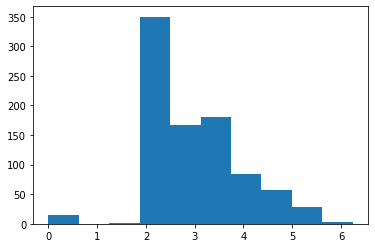

In [ ]:
#Impute missing values with median for Age
training.Age.fillna(training.Age.median(),inplace=True)

#Delete missing values from Embarke (2 obs)
training.dropna(subset=['Embarked'],inplace=True)

#Normalize Fare
training['Fare_norm']=np.log(training.Fare+1)
plt.hist(training['Fare_norm'])
plt.show()

In [ ]:
#Convert PClass to categorical
training['Pclass']=training['Pclass'].astype('str')

#Get dummy variables for categorical and create me X dataframe
X=pd.get_dummies(training[['Pclass','Fare_norm','SibSp','Parch','Age','Sex','Embarked','Relatives','Cabin_type','CabinPerPassenger']],drop_first=True)
X.dtypes

#Create y dataframe
y=training['Survived']

**Scaling Features**

In [ ]:
#Standard Scaler
scaler=StandardScaler()

X_scaled=X.copy()
X_scaled[['Fare_norm','SibSp','Parch','Age','Relatives']]=scaler.fit_transform(X_scaled[['Fare_norm','SibSp','Parch','Age','Relatives']])
X_scaled.shape

(888, 21)

**Split training set in X_train and y_train**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

Running some models

In [ ]:
#Logistic Regression
logreg=LogisticRegression(max_iter=2500)
cv_logreg=cross_val_score(logreg,X_train,y_train,cv=5)
print(cv_logreg)
print(cv_logreg.mean())

[0.74647887 0.81690141 0.80985915 0.78873239 0.83098592]
0.7985915492957746


In [ ]:
#Support Vector Machine (SVM)
svm=SVC()
cv_svm=cross_val_score(svm,X_train,y_train,cv=5)
print(cv_svm)
print(cv_svm.mean())

[0.77464789 0.86619718 0.81690141 0.8028169  0.84507042]
0.8211267605633802


In [ ]:
#KNN
knn=KNeighborsClassifier()
cv_knn=cross_val_score(knn,X_train,y_train,cv=5)
print(cv_knn)
print(cv_knn.mean())

[0.76056338 0.83098592 0.82394366 0.78873239 0.77464789]
0.7957746478873239


In [ ]:
#Random Forests
rf=RandomForestClassifier(random_state=1)
cv_rf=cross_val_score(rf,X_train,y_train,cv=5)
print(cv_rf)
print(cv_rf.mean())

[0.73239437 0.79577465 0.78873239 0.77464789 0.83802817]
0.7859154929577464


In [ ]:
#Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=200, 
            max_depth=2,
            random_state=2)
cv_gb=cross_val_score(gb,X_train,y_train,cv=5)
print(cv_gb)
print(cv_gb.mean())

[0.78169014 0.86619718 0.80985915 0.84507042 0.84507042]
0.8295774647887324


# **Hyperparameter tuning**

In this section we are going to improve the model performance for:

* KNN
* SVM
* Logistic Regression
* Gradient Boosting Classifier

In [ ]:
#Function to extract best score and best parameters for each model
def perfomance(model,model_name):
  print(model_name)
  print('Best score: '+str(model.best_score_))
  print('Best parameters: '+str(model.best_params_))


In [ ]:
#Tuning KNN
neighbors=[x for x in range(5,31)]
weights=['uniform','distance']
p=[1,2]

knn=KNeighborsClassifier()
params:knn={'n_neighbors':neighbors,
            'weights':weights,
            'p':p}

cv_knn=GridSearchCV(estimator=knn,param_grid=params,cv=5,n_jobs=-1)
cv_knn.fit(X_train,y_train)
perfomance(cv_knn,'KNN')
best_knn=cv_knn.best_estimator_

best_knn.fit(X_train,y_train)
y_pred=best_knn.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('KNN accuracy in test set: {:.3f}'.format(accuracy))


KNN
Best score: 0.8140845070422534
Best parameters: {'n_neighbors': 18, 'p': 1, 'weights': 'uniform'}
KNN accuracy in test set: 0.792


In [ ]:
#Tuning SVM
svm=SVC(probability=True)
params_svm={'C':[0.02,0.5,1,10,100,1000],
            'gamma':[0.1,0.01,0.001]}

cv_svm=GridSearchCV(svm,params_svm,cv=5,n_jobs=-1)
cv_svm.fit(X_train,y_train)
perfomance(cv_svm,'SVM')
best_svm=cv_svm.best_estimator_

best_svm.fit(X_train,y_train)
y_pred=best_svm.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('SVM accuracy in test set: {:.3f}'.format(accuracy))

SVM
Best score: 0.8253521126760563
Best parameters: {'C': 1000, 'gamma': 0.01}
SVM accuracy in test set: 0.775


In [ ]:
#Tuning Logistic Regression
logreg=LogisticRegression()
params_logreg={'penalty':['l1','l2'],
               'C':[x for x in np.linspace(0,1)],
               'fit_intercept':[True,False]}
cv_logreg=GridSearchCV(logreg,params_logreg,cv=5,n_jobs=-1)
cv_logreg.fit(X_train,y_train)
perfomance(cv_logreg,'Logistic Regression')
best_logreg=cv_logreg.best_estimator_

best_logreg.fit(X_train,y_train)
y_pred=best_logreg.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Logistic Regression accuracy in test set: {:.3f}'.format(accuracy))

Logistic Regression
Best score: 0.8140845070422535
Best parameters: {'C': 0.14285714285714285, 'fit_intercept': False, 'penalty': 'l2'}
Logistic Regression accuracy in test set: 0.798


In [ ]:
#Gradient Boosting Classifier
gb=GradientBoostingClassifier()
params_gb={'learning_rate':[x for x in np.linspace(0,0.2,8)],
           'n_estimators':[100,300],
           'max_depth':[x for x in range(1,6)]}
cv_gb=GridSearchCV(gb,params_gb,cv=5,n_jobs=-1)
cv_gb.fit(X_train,y_train)
perfomance(cv_gb,'Gradient Boosting')
best_gb=cv_gb.best_estimator_

best_gb.fit(X_train,y_train)
y_pred=best_gb.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Gradient Boosting accuracy in test set: {:.3f}'.format(accuracy))


Gradient Boosting
Best score: 0.8352112676056338
Best parameters: {'learning_rate': 0.028571428571428574, 'max_depth': 3, 'n_estimators': 300}
Gradient Boosting accuracy in test set: 0.809


In [ ]:
#Tuning Random Forest
rf=RandomForestClassifier()
params_rf={'n_estimators':[100,200,300,400],
           'criterion':['gini','entropy'],
           'random_state':[1]}
cv_rf=GridSearchCV(rf,params_rf,cv=5,n_jobs=-1)
cv_rf.fit(X_train,y_train)
perfomance(cv_rf,'Random Forest')
best_rf=cv_rf.best_estimator_

best_rf.fit(X_train,y_train)
y_pred=best_rf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Random Forest accuracy in test set: {:.3f}'.format(accuracy))

Random Forest
Best score: 0.7943661971830986
Best parameters: {'criterion': 'entropy', 'n_estimators': 100, 'random_state': 1}
Random Forest accuracy in test set: 0.798


In [ ]:
#Ensemble learning using voting classifier
from sklearn.ensemble import VotingClassifier

classifiers=[('Logistic Regression',best_logreg),('Gradient Boosting',best_gb),('SVM',best_svm)]
vc_hard=VotingClassifier(estimators=classifiers)

vc_hard.fit(X_train,y_train)
y_pred=vc_hard.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Voting Classifier accuracy in test set: {:.3f}'.format(accuracy))


Voting Classifier accuracy in test set: 0.809


# Preparing the Test data to make final predictions and submision

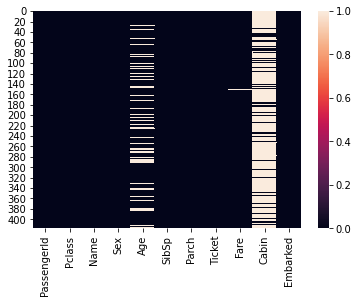

In [ ]:
#Load test data
test=pd.read_csv('/content/sample_data/test (3).csv')

#Evaluating Missing Values
sns.heatmap(test.isna())

In [ ]:
#Impute NaN values in Age
test.Age.fillna(test.Age.median(),inplace=True)

#Drop NaN in fare
test.Fare.fillna(test.Fare.mean(),inplace=True)

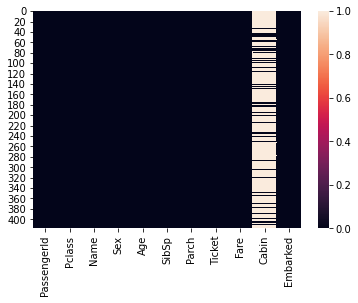

In [ ]:
#Check again Missing Values
sns.heatmap(test.isna())

**Data preprocesing for Test set**

In [ ]:
#Normalize Fare
test['Fare_norm']=np.log(test.Fare+1)

#Convert PClass to categorical
test['Pclass']=test['Pclass'].astype('str')

#Create a new feature relatives: sum of the SibSp+Parch
test['Relatives']=test.SibSp+test.Parch


#Create a variable that indicates the Cabin Classification
test['Cabin_type']=test['Cabin'].str[0]
test.Cabin_type.fillna('No Cabin',inplace=True)

#Create a feature that counts the number of cabins per passenger
test['CabinPerPassenger']=test.Cabin.apply(lambda x:0 if pd.isna(x) else len(x.split()))
test['CabinPerPassenger']=test['CabinPerPassenger'].astype('str')

#Get dummy variables for categorical and create me X dataframe
test_final=pd.get_dummies(test[['Pclass','Fare_norm','SibSp','Parch','Age','Sex',
                                'Embarked','Relatives','Cabin_type','CabinPerPassenger']],drop_first=True)

test_final_scaled=test_final.copy()
test_final_scaled[['Fare_norm','SibSp','Parch','Age','Relatives']]=scaler.fit_transform(test_final_scaled[['Fare_norm','SibSp','Parch','Age','Relatives']])

In [ ]:
#Fixing problem with cabin T
print(test_final_scaled.columns)
print(X_scaled.columns)
print(test.Cabin.unique())
print(training.Cabin.value_counts())

print(X_scaled.shape)
print(test_final_scaled.shape)

**Making Predictions**

In [ ]:
#Predictions
y_pred=vc_hard.predict(test_final_scaled)

#Add predictions to test
test['Survived']=y_pred
test.head()

#Extract Passenger ID and predictions
results=test[['PassengerId','Survived']]
results.shape


(418, 2)

In [ ]:
#Create Submision file
results.to_csv('submision.csv',index=False)